## Import Library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

2025-04-16 22:47:23.792821: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from sklearn.metrics import classification_report

## Load data

In [3]:
data = fashion_mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = data.load_data()

In [5]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [7]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Show Sample Images

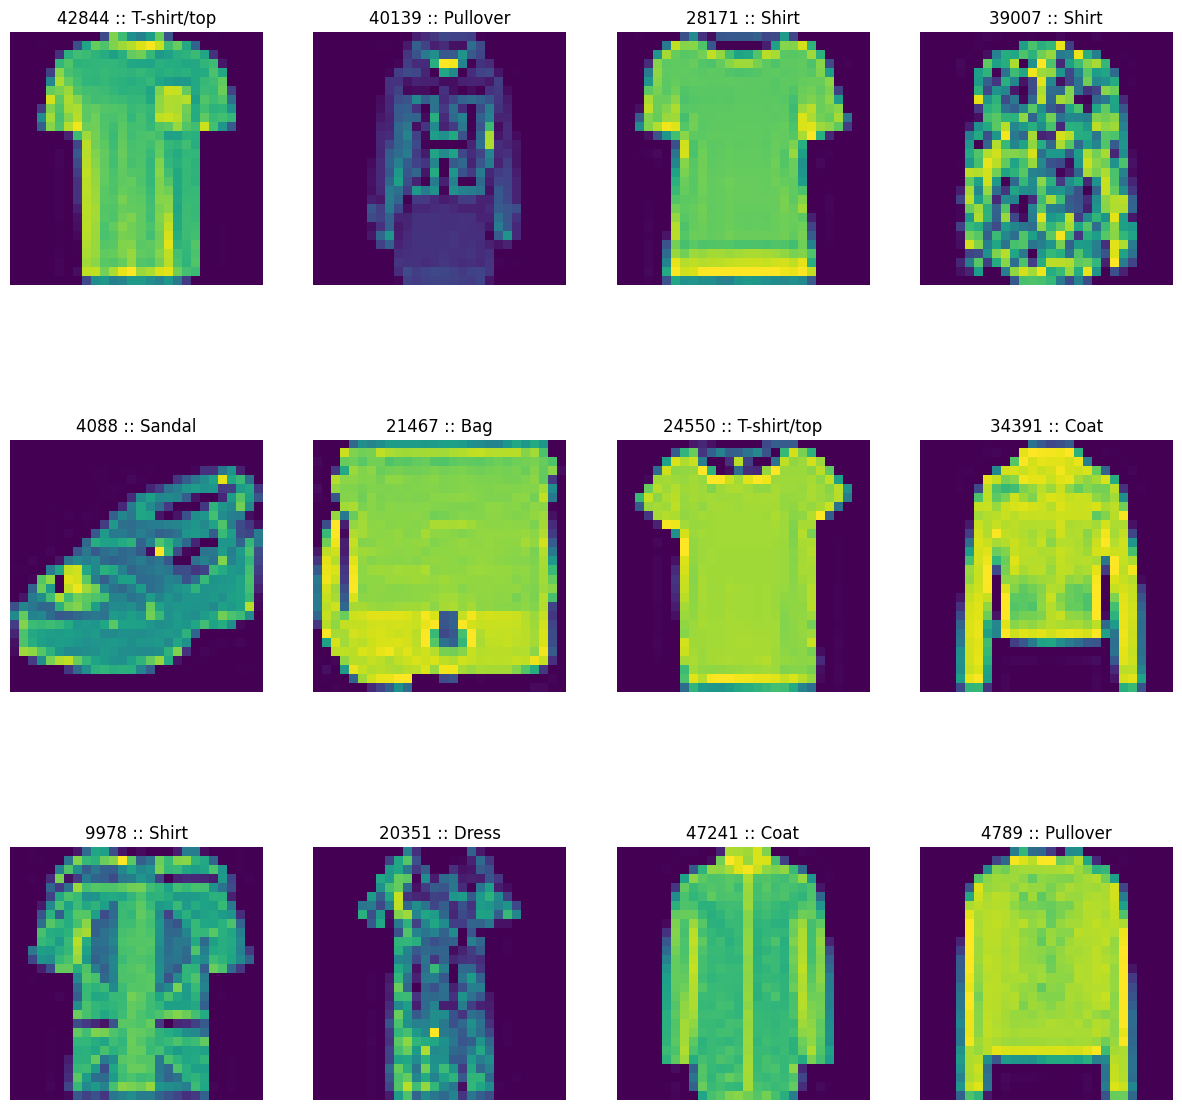

In [8]:
img_idx = np.random.choice(X_train.shape[0], 12)

plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx])
    label_idx = Y_train[idx]
    plt.title(f"{idx} :: {labels[label_idx]}")
    plt.axis("off")

## Data preprocessing

### Normalization

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

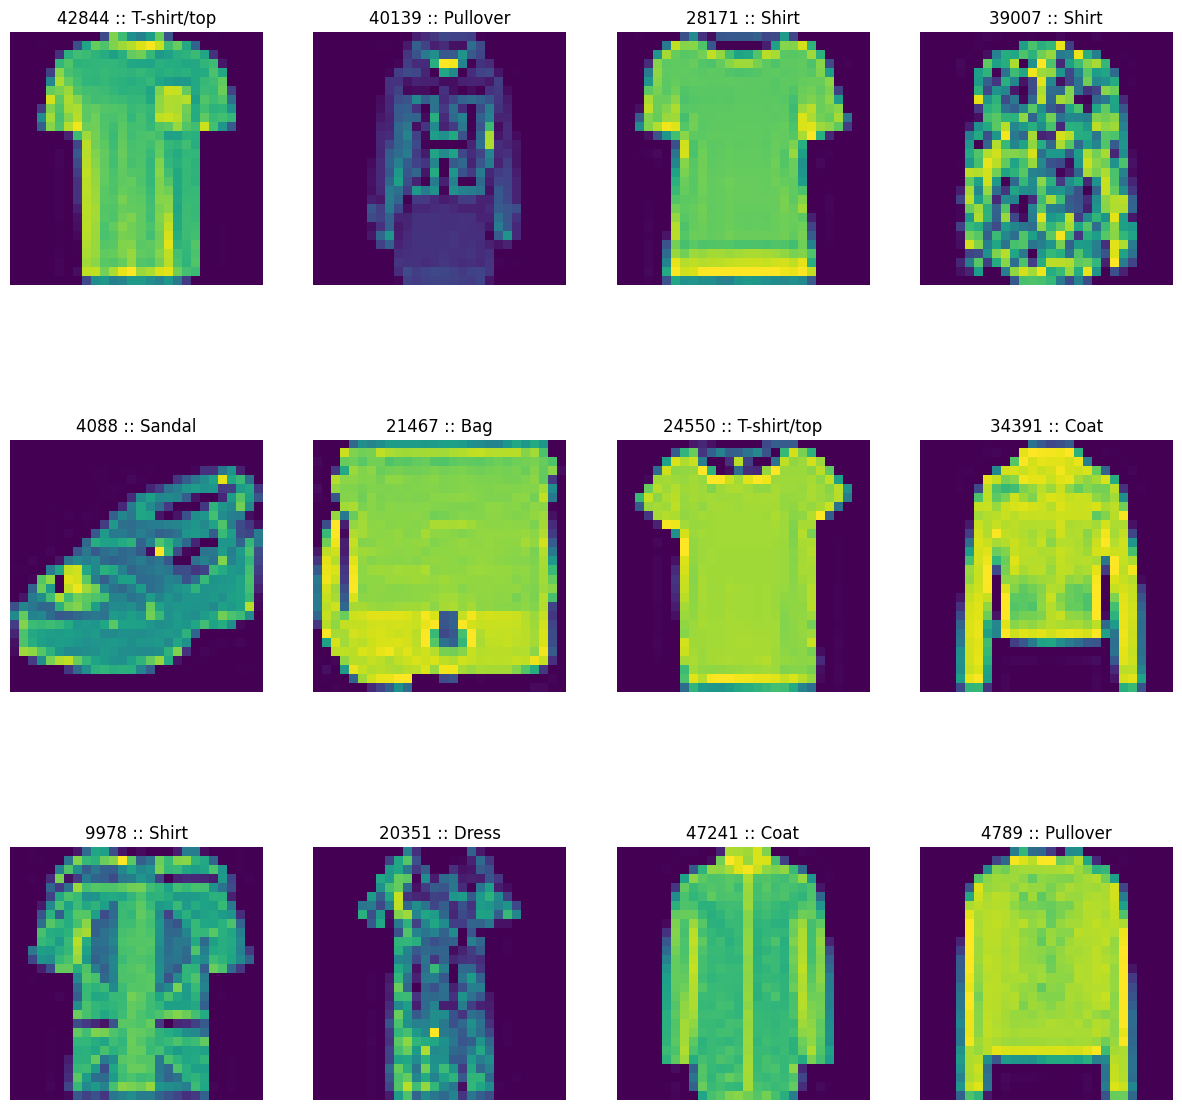

In [10]:
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[idx])
    label_idx = Y_train[idx]
    plt.title(f"{idx} :: {labels[label_idx]}")
    plt.axis("off")

### Image to vector

In [11]:
X_train.reshape(60000, 1,-1).shape

(60000, 1, 784)

In [12]:
flatten_X_train = X_train.reshape(60000, 784)
flatten_X_test = X_test.reshape(10000, 784)

In [13]:
flatten_X_train.shape, flatten_X_test.shape

((60000, 784), (10000, 784))

### One hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
encoder = OneHotEncoder()
enc_Y_train = encoder.fit_transform(Y_train.reshape(-1,1))
enc_Y_train = enc_Y_train.toarray()
enc_Y_test = encoder.transform(Y_test.reshape(-1,1))
enc_Y_test = enc_Y_test.toarray()

In [16]:
enc_Y_train.shape, enc_Y_test.shape

((60000, 10), (10000, 10))

### Split train-valid set

In [17]:
enc_Y_test.shape[0] / (enc_Y_train.shape[0] + enc_Y_test.shape[0])

0.14285714285714285

In [18]:
enc_Y_train.shape[0] / (enc_Y_train.shape[0] + enc_Y_test.shape[0])

0.8571428571428571

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_X, val_X, train_y, val_y = train_test_split(flatten_X_train, enc_Y_train, test_size=0.3, random_state=0)

In [21]:
train_X.shape, train_y.shape

((42000, 784), (42000, 10))

In [22]:
val_X.shape, val_y.shape

((18000, 784), (18000, 10))

## Create model

### Model sequential

In [23]:
model = Sequential()

In [24]:
model.add(Dense(units=784, activation='sigmoid', input_shape = (train_X.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [26]:
model.compile(optimizer='SGD', metrics=['accuracy'],
             loss='categorical_crossentropy')

### Train model

In [27]:
model.fit(x=train_X, y=train_y, epochs=10, 
          batch_size=100, validation_data=(val_X, val_y))

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4164 - loss: 1.9877 - val_accuracy: 0.6948 - val_loss: 1.3224
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6940 - loss: 1.2230 - val_accuracy: 0.7159 - val_loss: 1.0209
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7198 - loss: 0.9729 - val_accuracy: 0.7323 - val_loss: 0.8848
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7361 - loss: 0.8534 - val_accuracy: 0.7392 - val_loss: 0.8082
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7460 - loss: 0.7879 - val_accuracy: 0.7494 - val_loss: 0.7609
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7528 - loss: 0.7431 - val_accuracy: 0.7544 - val_loss: 0.7222
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7659 - loss: 0.6983 - val_accuracy: 0.7616 - val_loss: 0.6954
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7721 - loss: 0.6713 - val_accuracy: 0.

### Training evaluation

In [28]:
hist = model.history.history

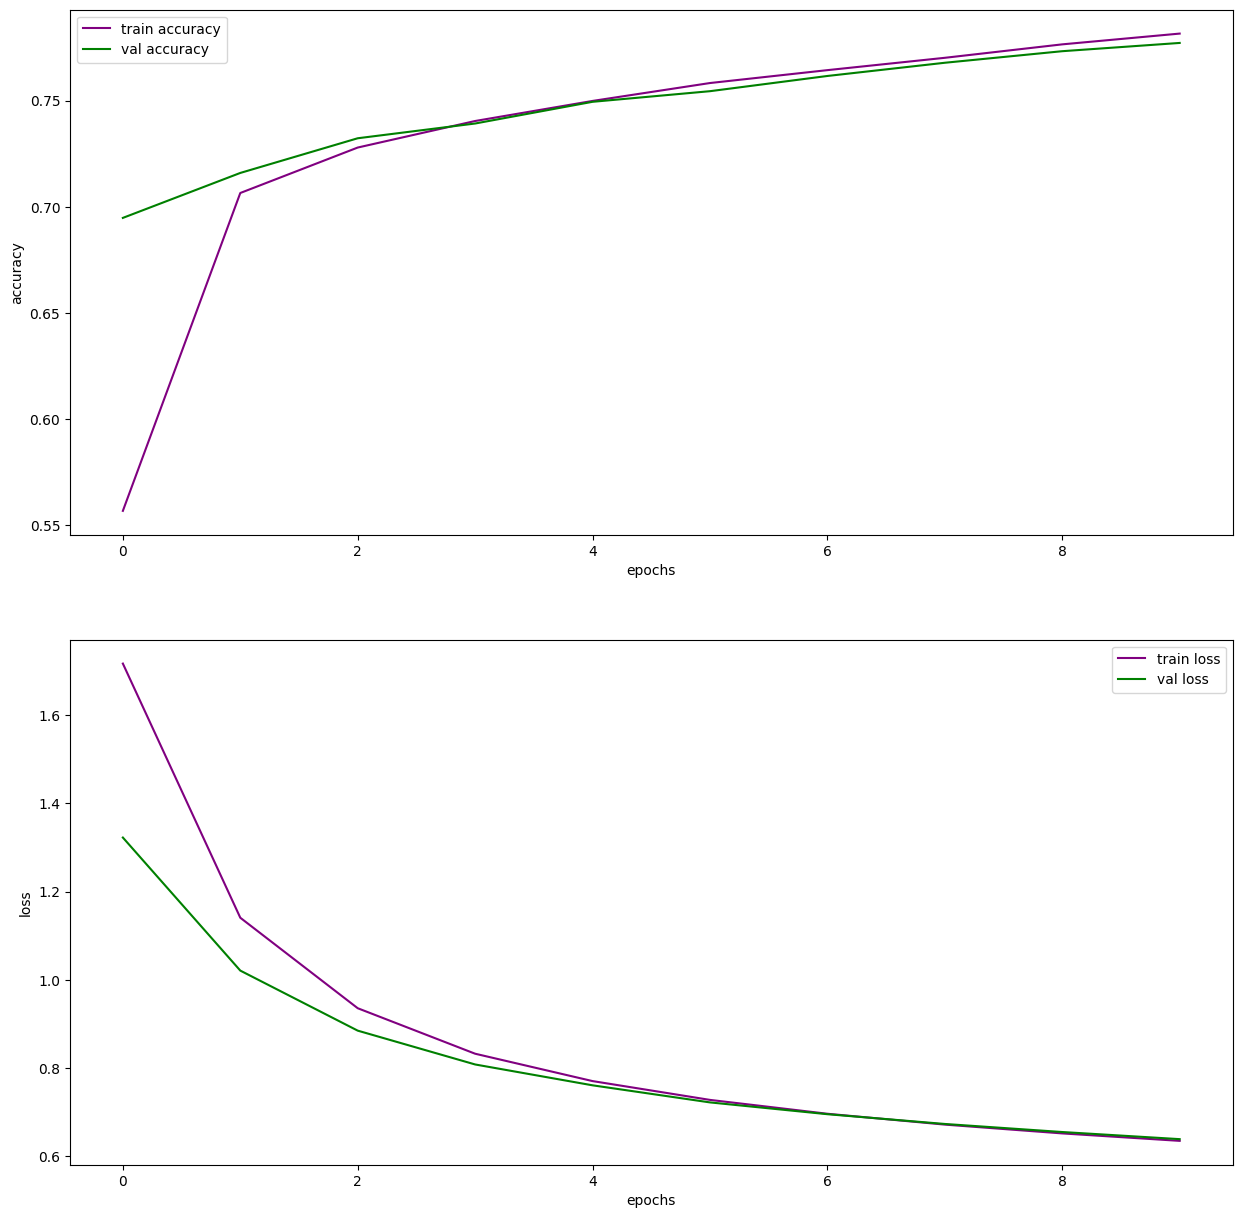

In [29]:
plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test model

In [30]:
y_hat = model.predict(flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
y_hat_idx = [np.argmax(pred) for pred in y_hat]

In [32]:
y_hat_idx[0], Y_test[0]

(9, 9)

In [33]:
y_hat[0]

array([2.9226582e-04, 1.3901789e-04, 9.3332422e-04, 5.9382699e-04,
       9.6891716e-04, 3.3398184e-01, 1.3292807e-03, 2.4263895e-01,
       3.9491870e-02, 3.7963071e-01], dtype=float32)

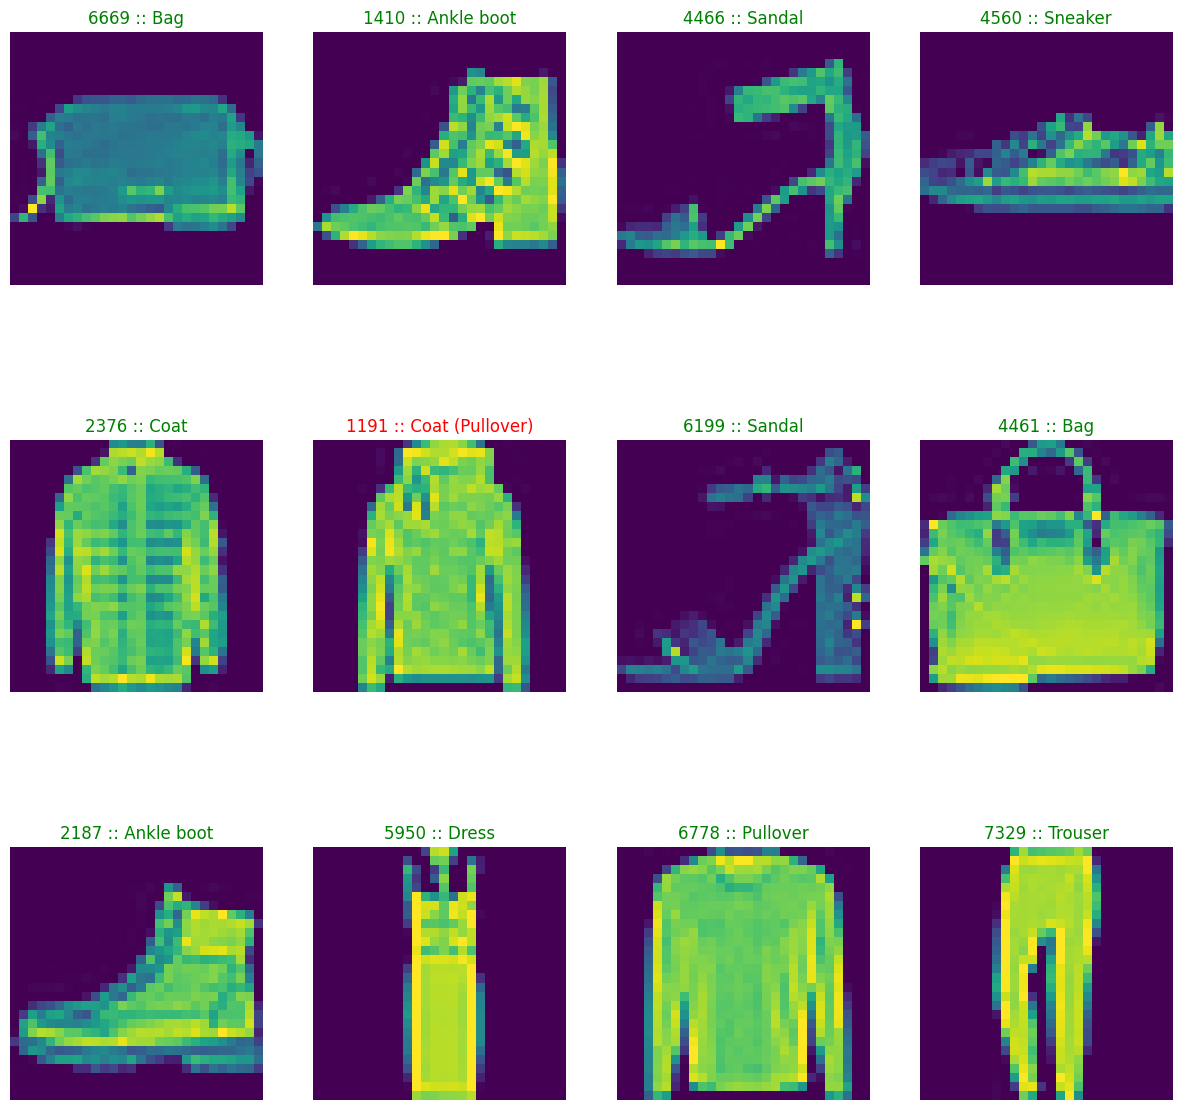

In [34]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [35]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 77.14%


### Classification report

In [36]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.77      0.76      1000
     Trouser       0.97      0.91      0.94      1000
    Pullover       0.67      0.61      0.64      1000
       Dress       0.73      0.85      0.78      1000
        Coat       0.65      0.68      0.67      1000
      Sandal       0.83      0.82      0.82      1000
       Shirt       0.47      0.41      0.44      1000
     Sneaker       0.83      0.85      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.87      0.91      0.89      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [37]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

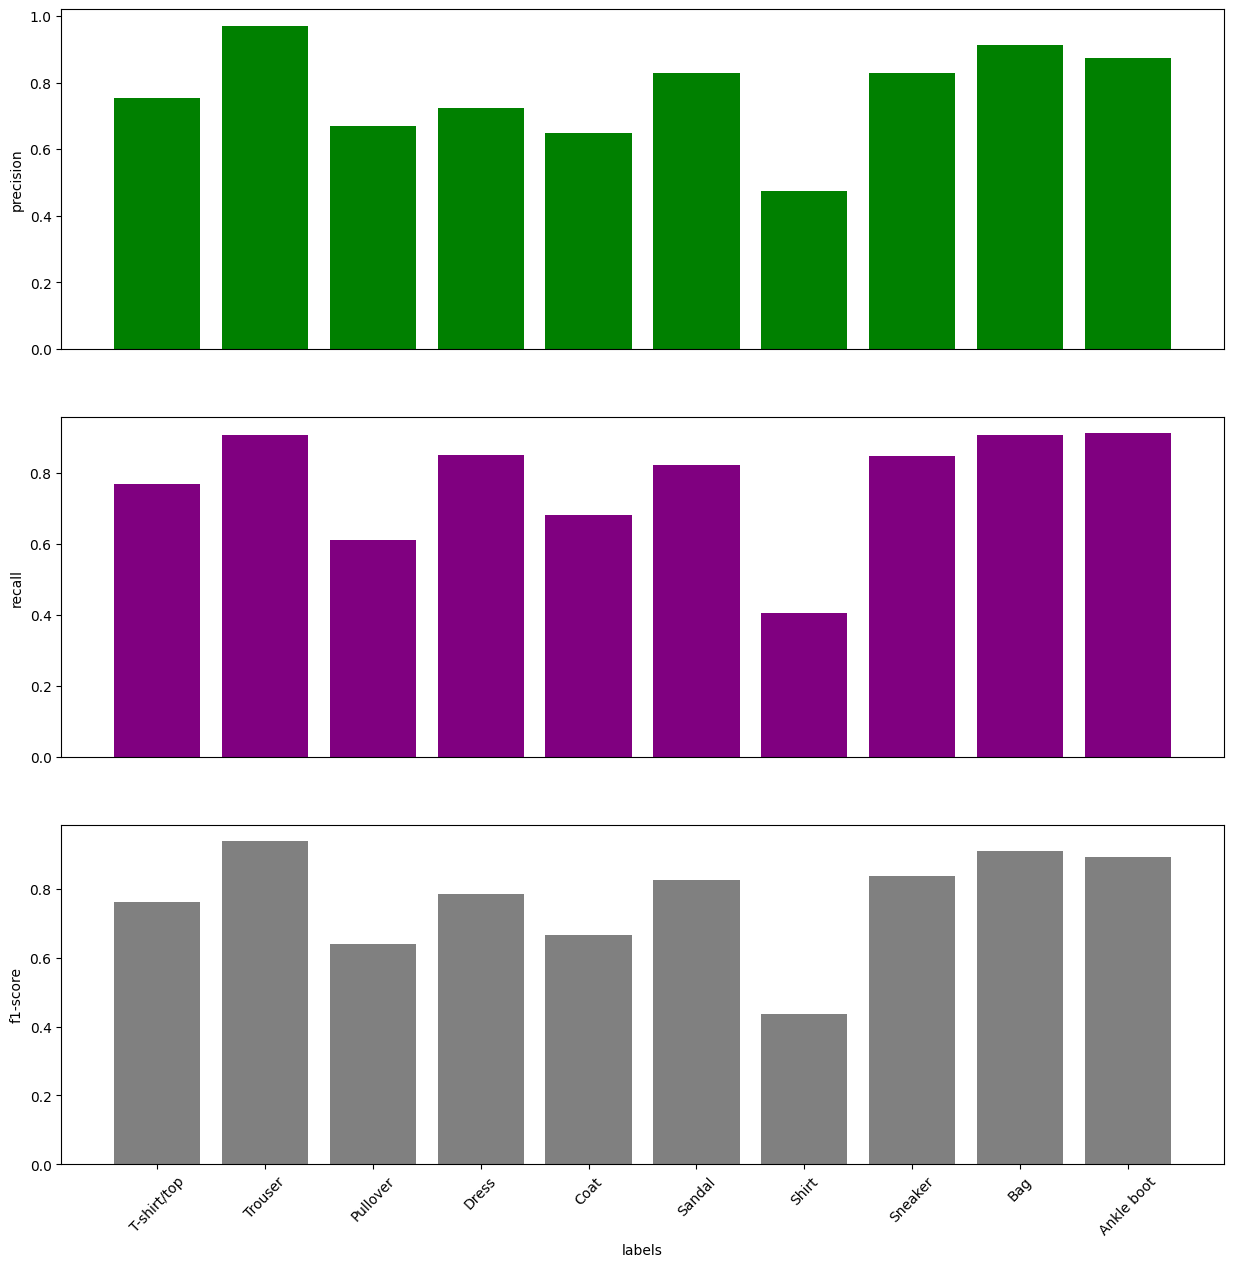

In [38]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Create model with ReLU

### Model sequential

In [39]:
model2 = Sequential()

In [40]:
model2.add(Dense(units=784, activation='relu', input_shape=(train_X.shape[1],)))
model2.add(Dense(units=10, activation='softmax'))

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

### Model compile

In [42]:
model2.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='adam')

### Train model

In [43]:
model2.fit(x=train_X, y=train_y, 
           validation_data=(val_X, val_y), epochs=10, batch_size=100)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7721 - loss: 0.6597 - val_accuracy: 0.8386 - val_loss: 0.4430
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8600 - loss: 0.3871 - val_accuracy: 0.8587 - val_loss: 0.3852
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8712 - loss: 0.3456 - val_accuracy: 0.8698 - val_loss: 0.3566
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8854 - loss: 0.3143 - val_accuracy: 0.8806 - val_loss: 0.3391
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8940 - loss: 0.2903 - val_accuracy: 0.8866 - val_loss: 0.3175
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8977 - loss: 0.2754 - val_accuracy: 0.8873 - val_loss: 0.3116
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9033 - loss: 0.2648 - val_accuracy: 0.8821 - val_loss: 0.3281
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9069 - loss: 0.2490 - val_accu

### Training evaluation

In [44]:
hist = model2.history.history

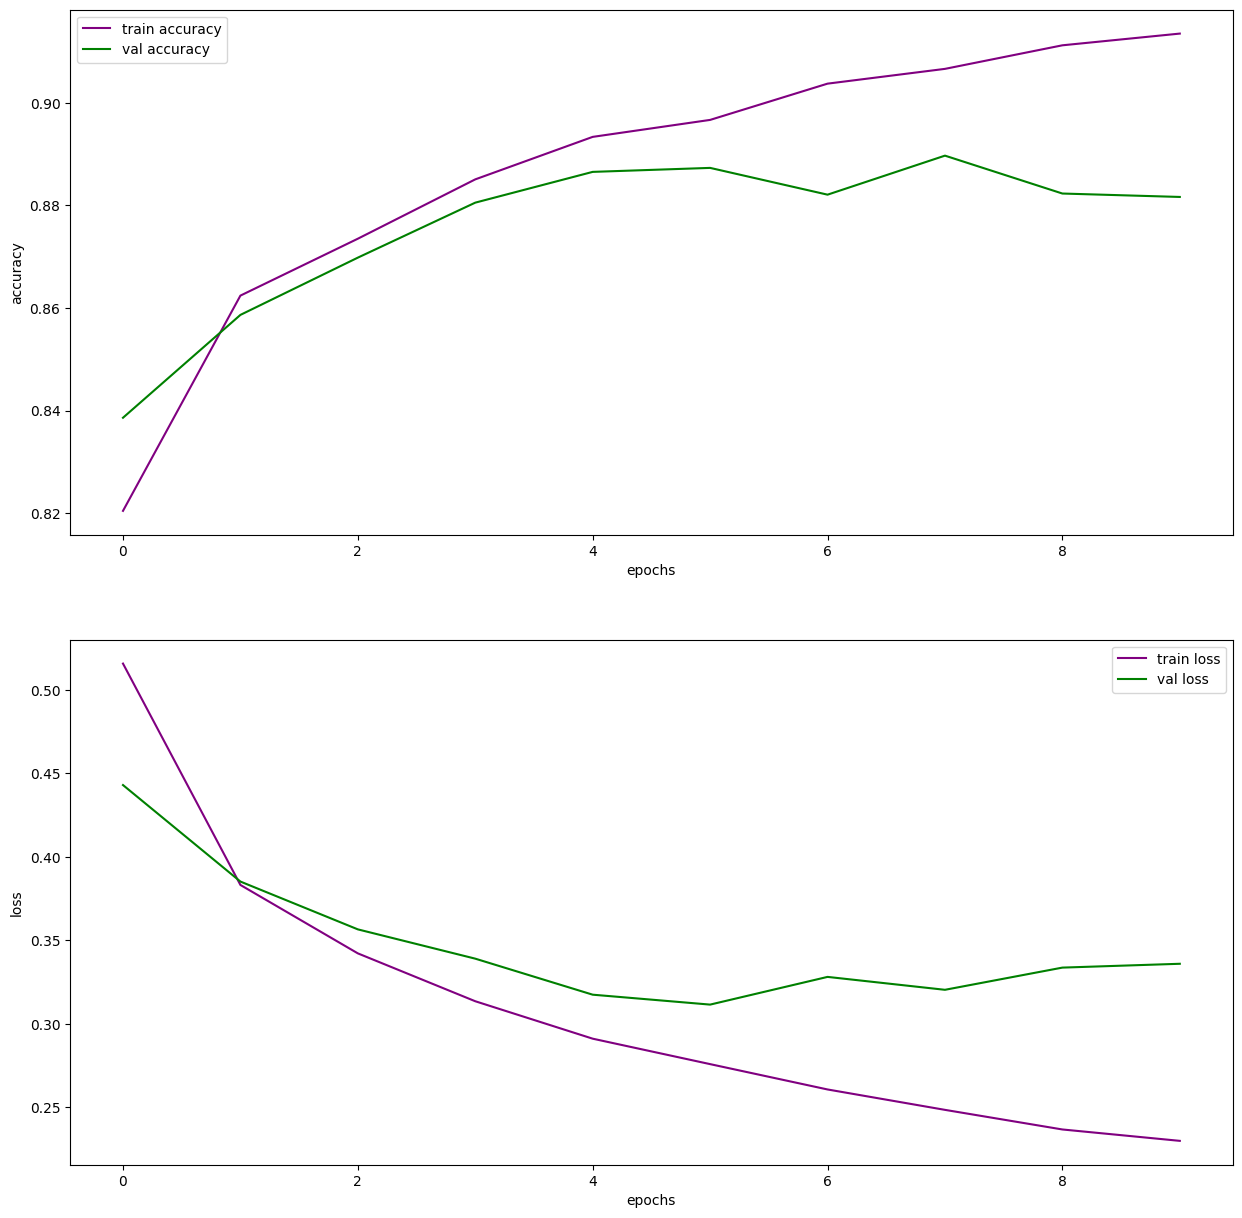

In [45]:
plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test model

In [46]:
y_hat = model2.predict(flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [47]:
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

(9, 9)

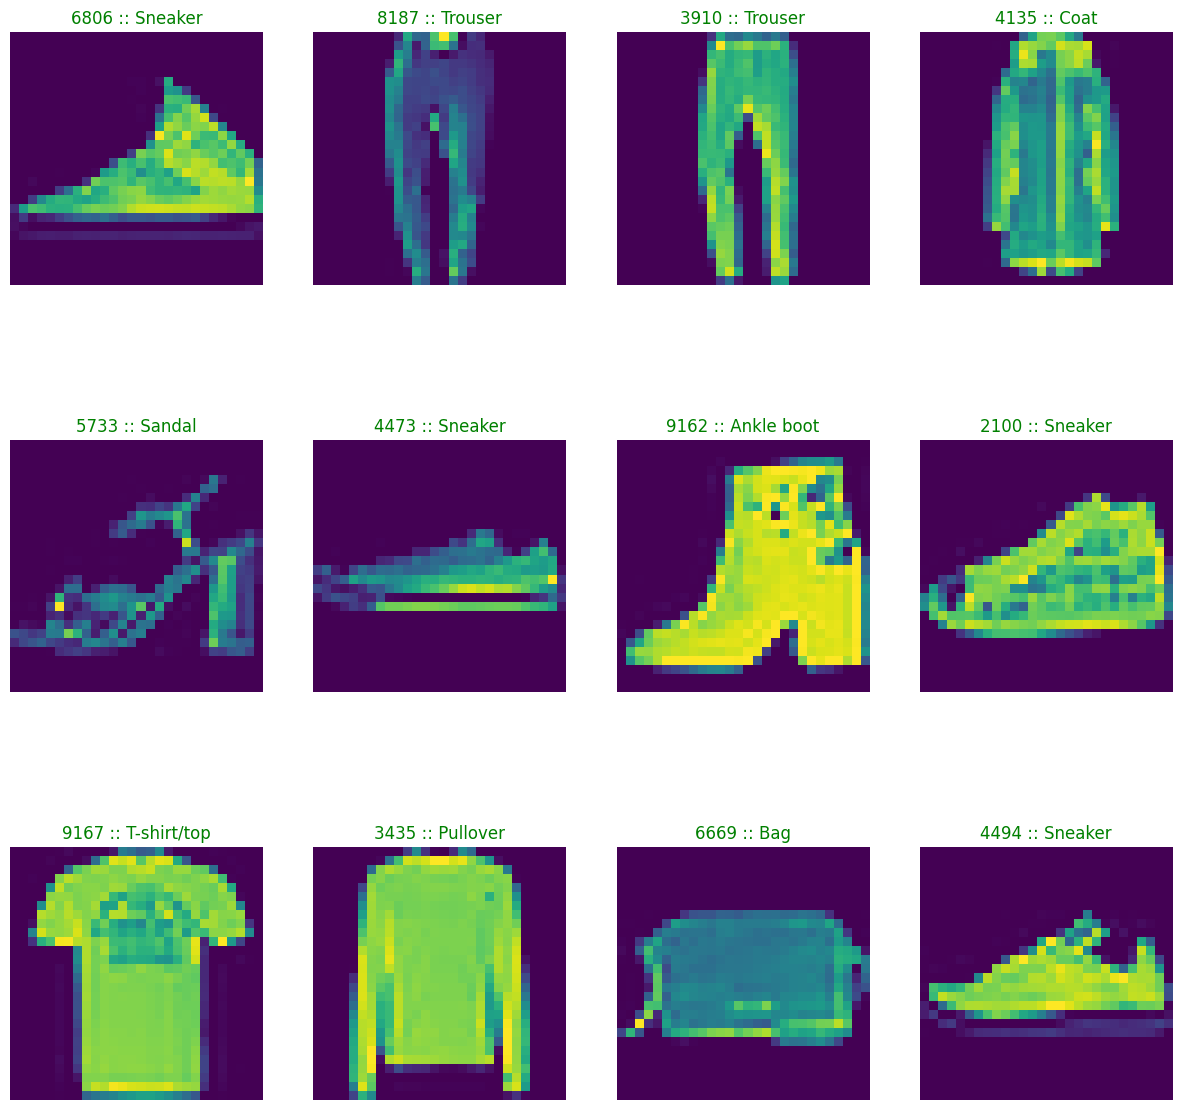

In [48]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [49]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 86.85%


### Classification report

In [50]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.69      0.79      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.84      0.66      0.74      1000
       Dress       0.86      0.92      0.89      1000
        Coat       0.76      0.84      0.80      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.60      0.81      0.69      1000
     Sneaker       0.91      0.98      0.94      1000
         Bag       0.99      0.94      0.97      1000
  Ankle boot       0.98      0.92      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [51]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

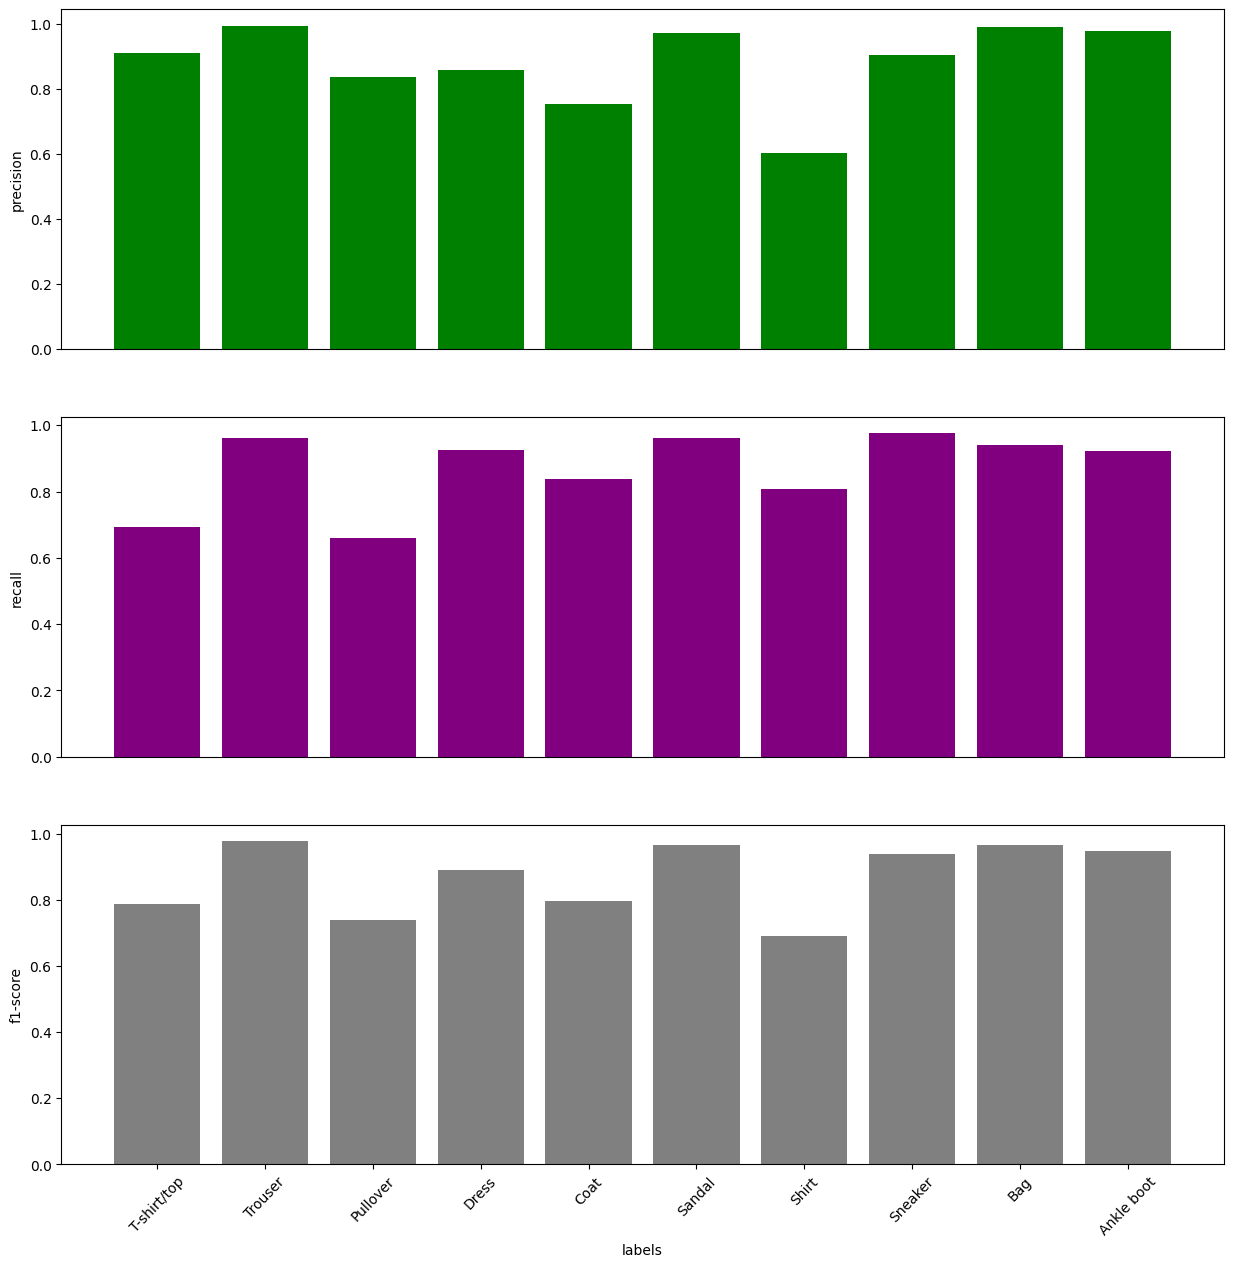

In [52]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Create model with callbacks

### early stopping

#### Model sequential

In [53]:
model3 = Sequential()
model3.add(Dense(units=784, activation='relu', input_shape=(train_X.shape[1],)))
model3.add(Dense(units=10, activation='softmax'))

model3.summary()

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Model compile

In [54]:
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

#### Add eatly stopping

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
earlystopping = EarlyStopping(monitor='val_accuracy', patience=3)

#### Train model

In [57]:
model3.fit(x=train_X, y=train_y, epochs=10,batch_size=100, 
           callbacks=[earlystopping], validation_data=(val_X, val_y))

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.7655 - loss: 0.6669 - val_accuracy: 0.8386 - val_loss: 0.4508
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8567 - loss: 0.3965 - val_accuracy: 0.8736 - val_loss: 0.3559
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8772 - loss: 0.3377 - val_accuracy: 0.8635 - val_loss: 0.3742
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8836 - loss: 0.3150 - val_accuracy: 0.8666 - val_loss: 0.3579
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8903 - loss: 0.2969 - val_accuracy: 0.8798 - val_loss: 0.3262
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9001 - loss: 0.2696 - val_accuracy: 0.8834 - val_loss: 0.3197
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9047 - loss: 0.2618 - val_accuracy: 0.8874 - val_loss: 0.3100
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9124 - loss: 0.2391 - val_accu

#### Training evaluation

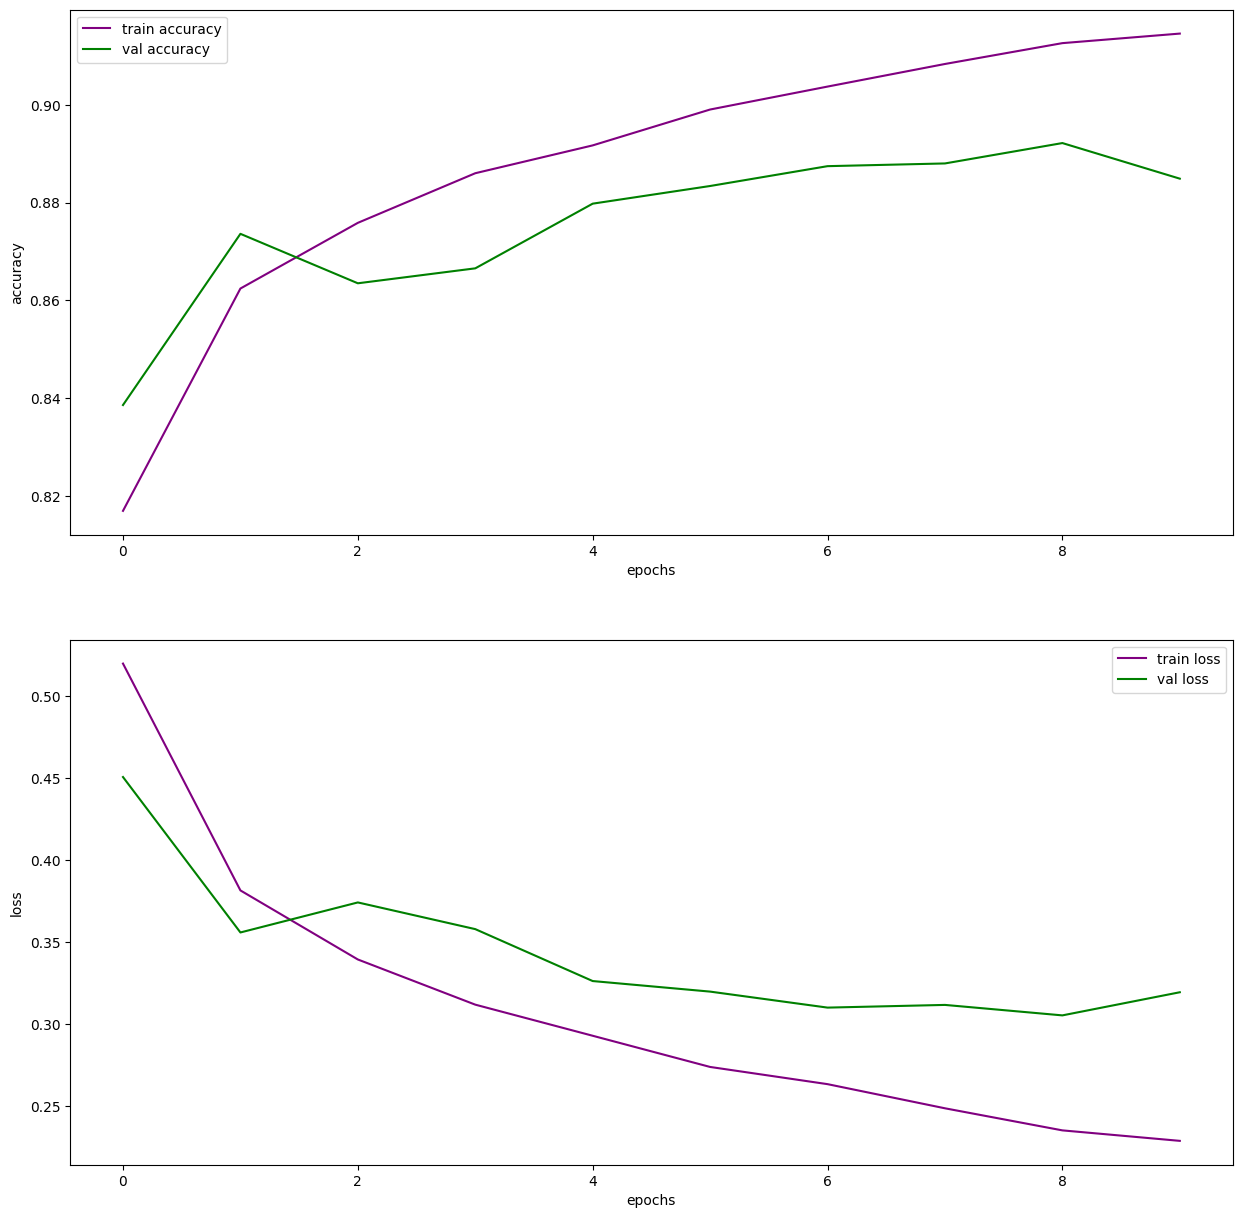

In [58]:
hist = model3.history.history

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Test model

In [59]:
y_hat = model3.predict(flatten_X_test)
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(9, 9)

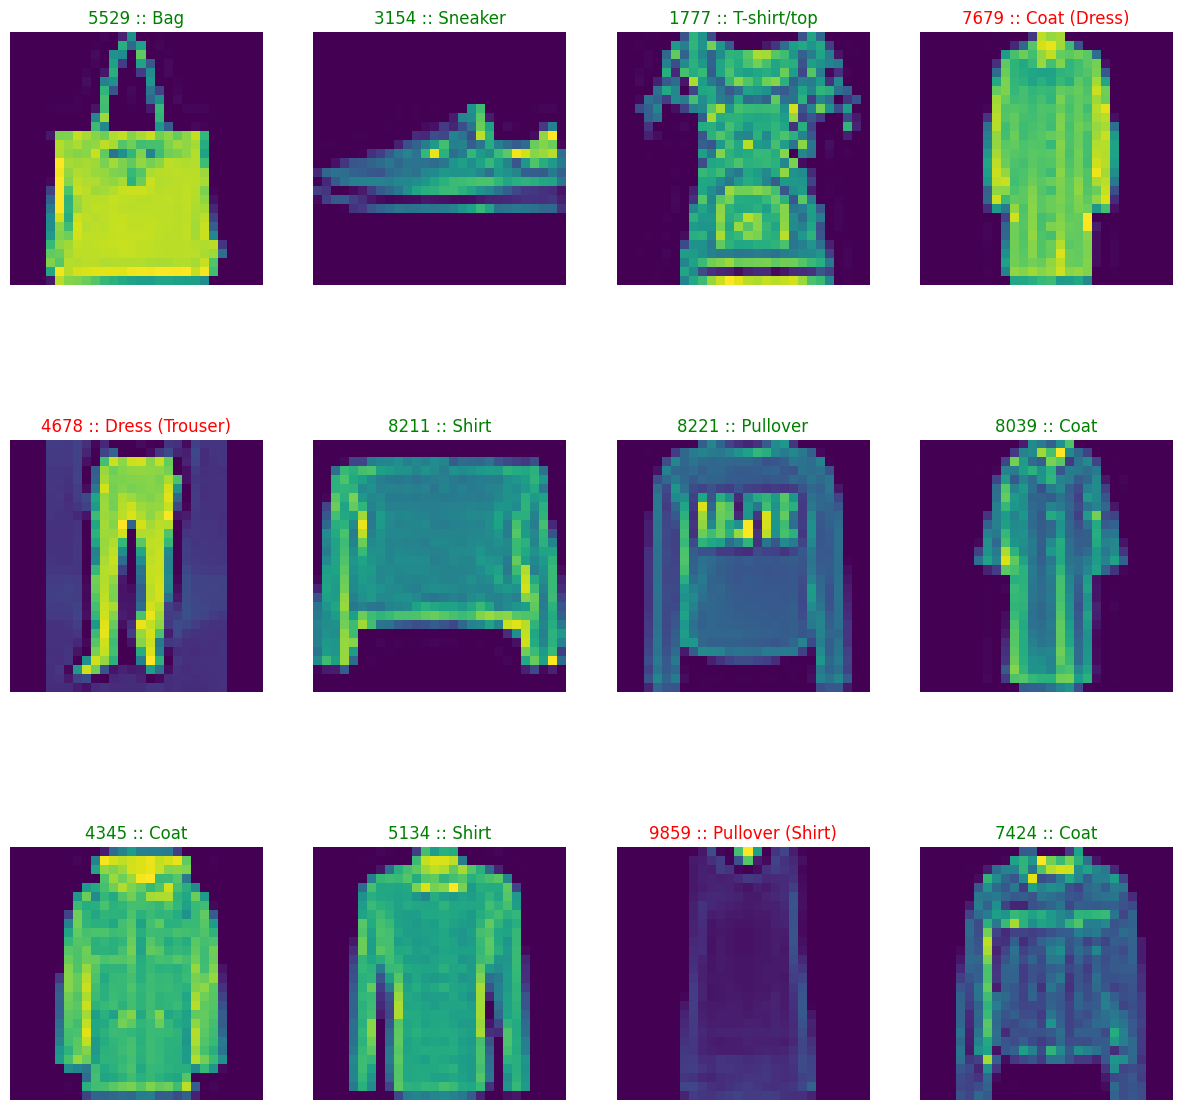

In [60]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [61]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 87.57%


#### Classification report

In [62]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.68      0.77      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.79      0.80      1000
       Dress       0.86      0.90      0.88      1000
        Coat       0.79      0.82      0.80      1000
      Sandal       0.96      0.97      0.96      1000
       Shirt       0.64      0.76      0.69      1000
     Sneaker       0.96      0.93      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



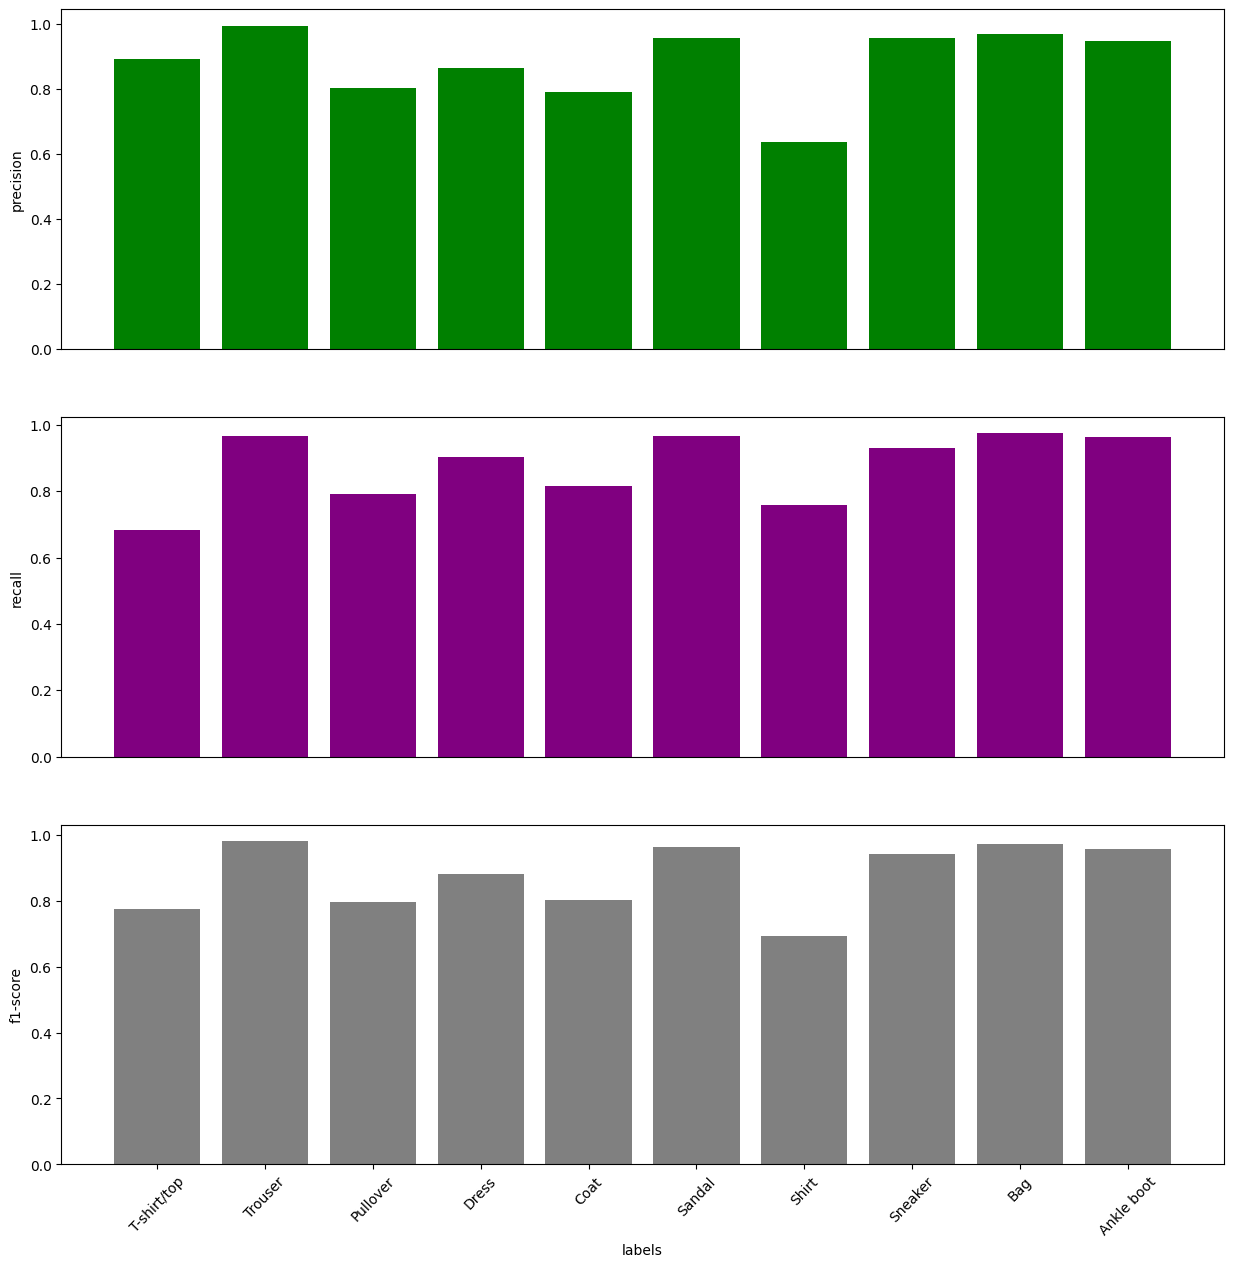

In [63]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])


plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

### Model Check Point and second hidden layer

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

#### Model Sequential

In [65]:
model4 = Sequential()

model4.add(Dense(units=784, activation='relu', input_shape=(train_X.shape[1],)))
model4.add(Dense(units=128, activation='relu'))
model4.add(Dense(units=64, activation='relu'))
model4.add(Dense(units = 10, activation='softmax'))

model4.summary()

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,826 (2.76 MB)

 Trainable params: 724,826 (2.76 MB)

 Non-trainable params: 0 (0.00 B)

#### check point and early stopping

In [66]:
checkpoint = ModelCheckpoint(filepath=f'model_checkpoint.keras',
                            monitor='val_accuracy', save_best_only=True)

In [67]:
earlystopping = EarlyStopping(patience=3, monitor='val_accuracy')

#### Model Compile

In [68]:
model4.compile(loss='categorical_crossentropy', metrics = ['accuracy'], 
               optimizer='adam')

#### Train model

In [69]:
model4.fit(x=train_X, y=train_y,
          epochs=20, validation_data=(val_X, val_y),
          callbacks=[earlystopping, checkpoint],
          batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.7451 - loss: 0.7120 - val_accuracy: 0.8404 - val_loss: 0.4399
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.8597 - loss: 0.3845 - val_accuracy: 0.8523 - val_loss: 0.4040
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.8750 - loss: 0.3408 - val_accuracy: 0.8661 - val_loss: 0.3642
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8827 - loss: 0.3132 - val_accuracy: 0.8728 - val_loss: 0.3420
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8964 - loss: 0.2858 - val_accuracy: 0.8813 - val_loss: 0.3217
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.8947 - loss: 0.2748 - val_accuracy: 0.8797 - val_loss: 0.3331
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9039 - loss: 0.2569 - val_accuracy: 0.8799 - val_loss: 0.3299
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.9055 - loss: 0.2494 - 

#### Training evaluation

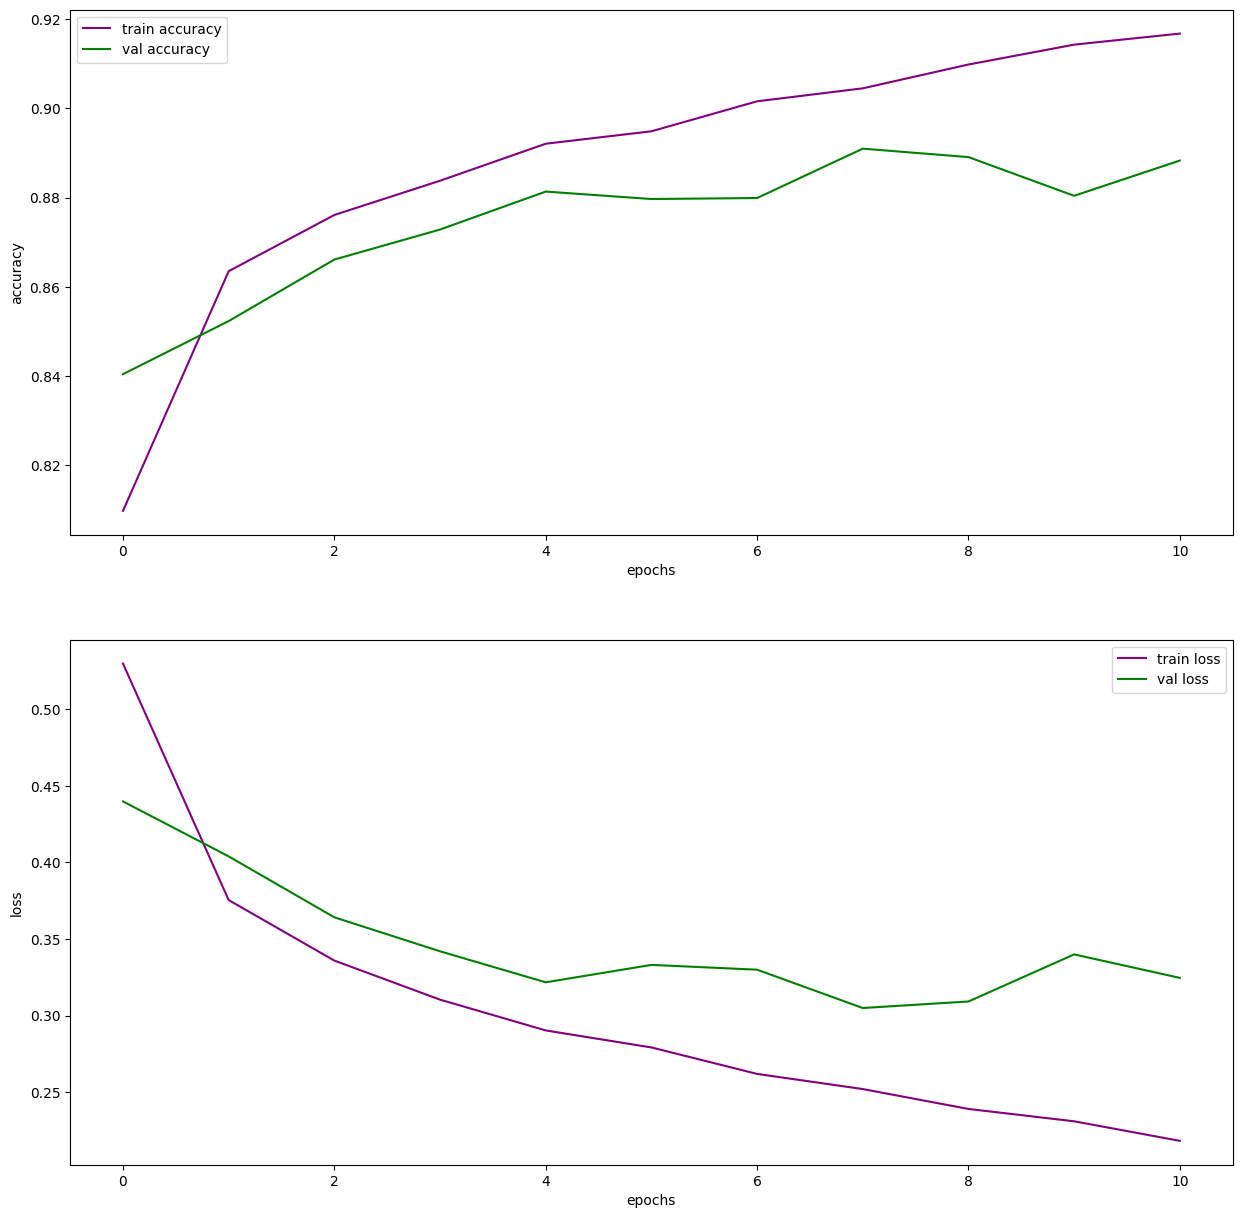

In [70]:
hist = model4.history.history

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Test model

In [71]:
model4.load_weights('model_checkpoint.keras')

In [72]:
y_hat = model4.predict(flatten_X_test)
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(9, 9)

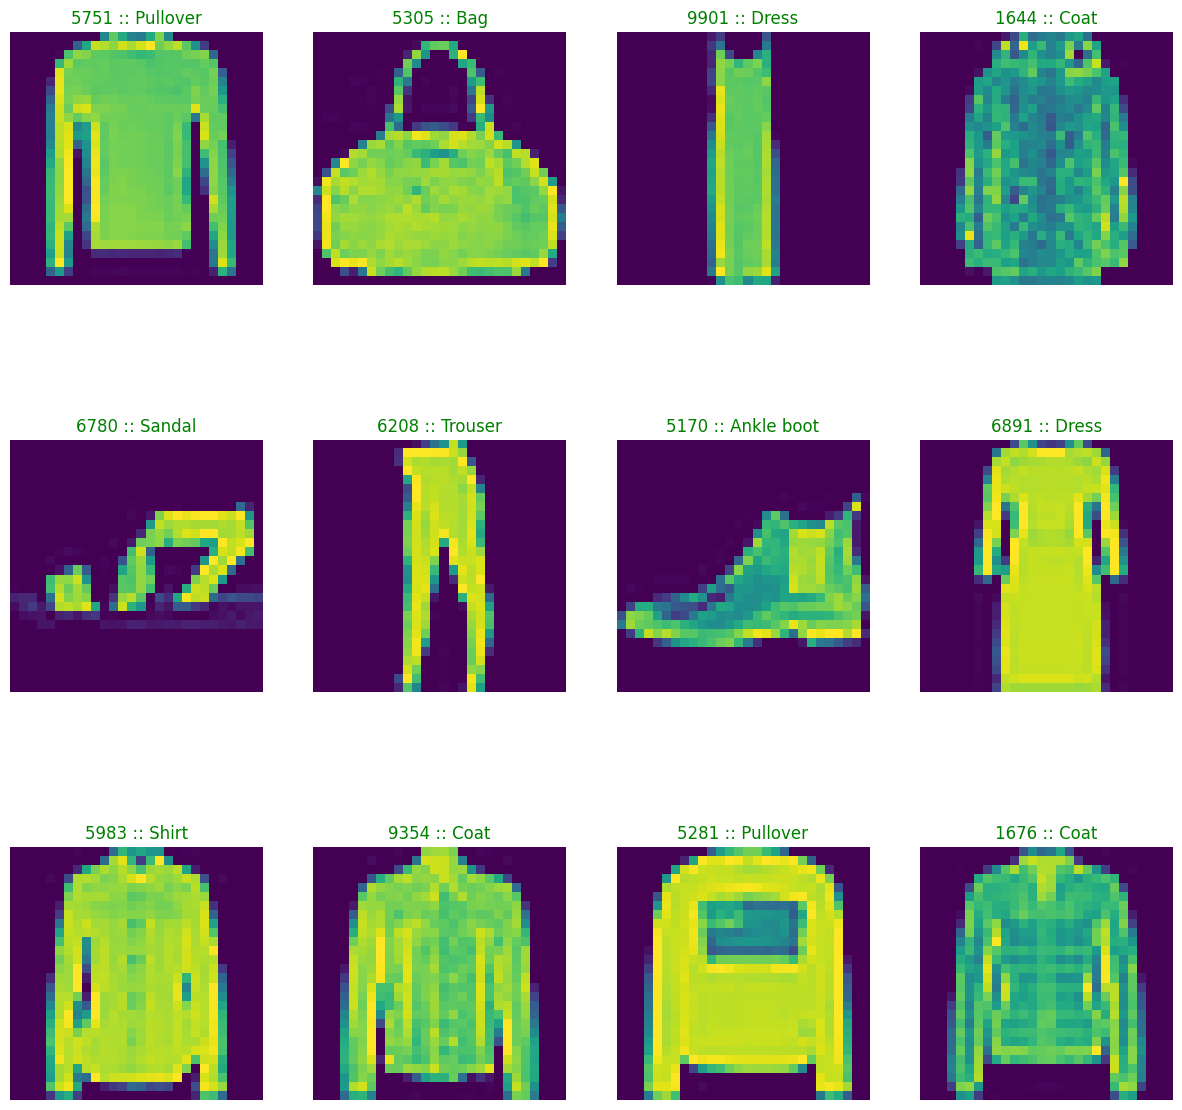

In [73]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [74]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.09%


####  Classification report

In [75]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.96      0.98      0.97      1000
    Pullover       0.82      0.76      0.79      1000
       Dress       0.89      0.88      0.88      1000
        Coat       0.80      0.79      0.80      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.66      0.74      0.70      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



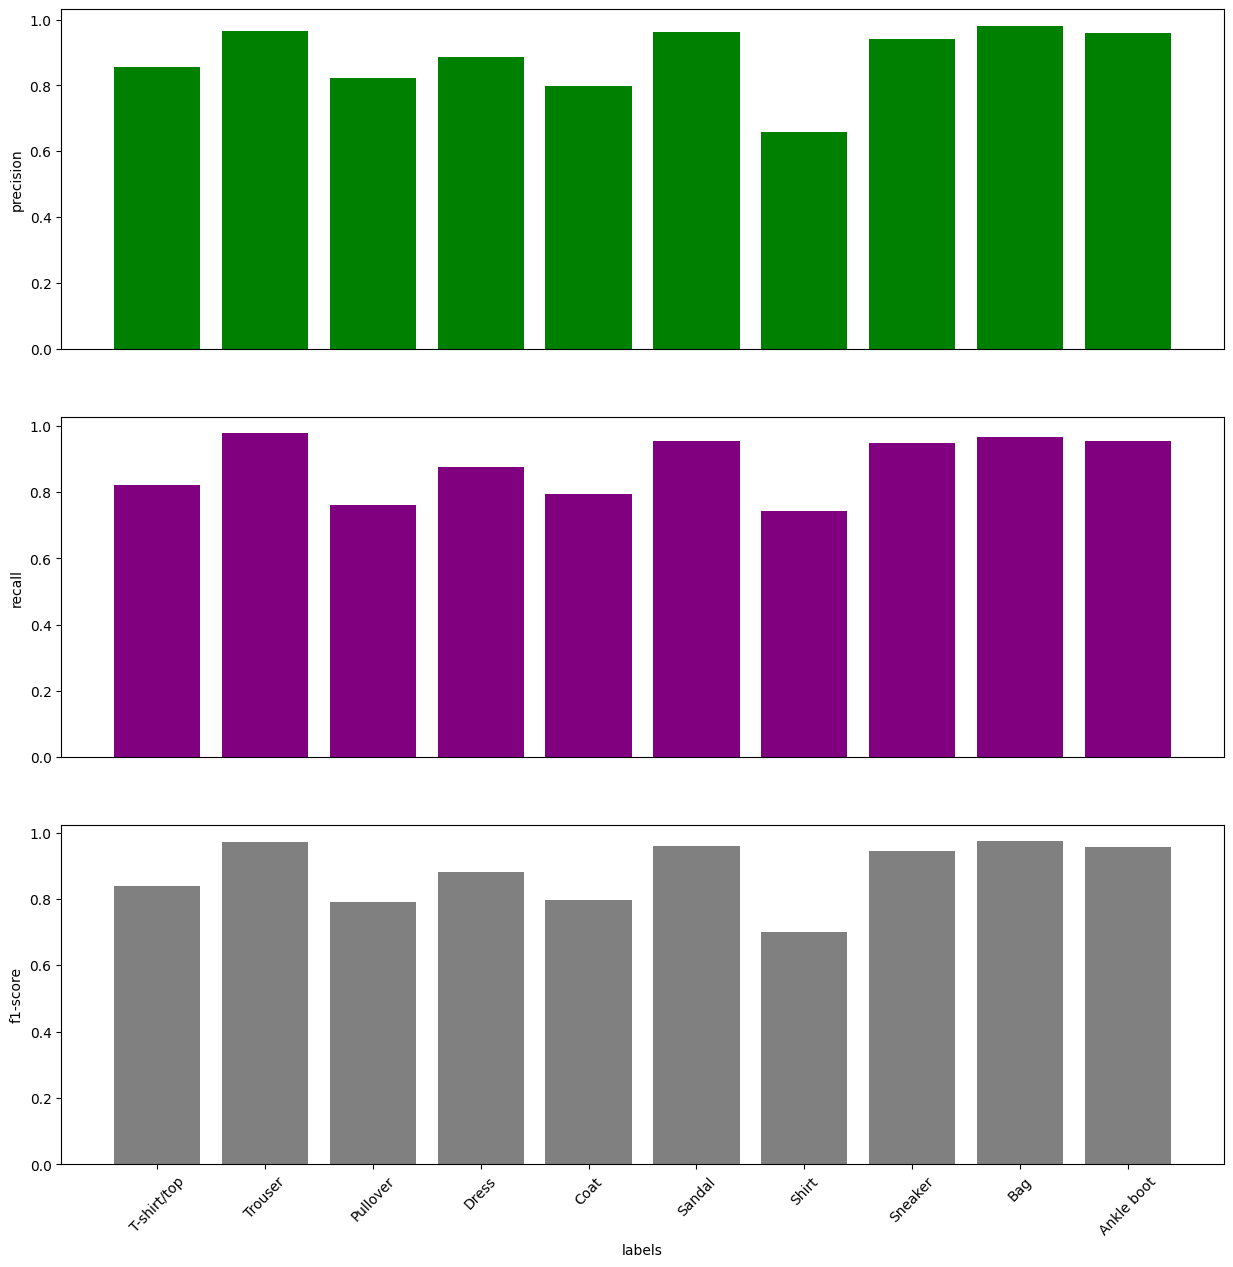

In [76]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])


plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Add Dropout 

In [77]:
from tensorflow.keras.layers import Dropout

### Model sequential

In [78]:
model5 = Sequential()
model5.add(Dense(units = 784, activation='relu', input_shape=(train_X.shape[1],)))
model5.add(Dense(units=128, activation='relu'))
model5.add(Dropout(0.3))
model5.add(Dense(units = 10, activation='softmax'))

model5.summary()

/Users/macbookpro/miniforge3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

### Model compile

In [79]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

### Early stopping and check point

In [80]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 3)

In [81]:
check_point = ModelCheckpoint('model5_checkpoint.keras', save_best_only=True)

### Train model

In [82]:
model5.fit(x=train_X, y=train_y, validation_data=(val_X, val_y),
          callbacks=[early_stopping, check_point], epochs=20, batch_size=100)

Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7382 - loss: 0.7460 - val_accuracy: 0.8468 - val_loss: 0.4177
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8498 - loss: 0.4163 - val_accuracy: 0.8693 - val_loss: 0.3614
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.8661 - loss: 0.3657 - val_accuracy: 0.8654 - val_loss: 0.3624
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.8767 - loss: 0.3339 - val_accuracy: 0.8752 - val_loss: 0.3367
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8805 - loss: 0.3193 - val_accuracy: 0.8798 - val_loss: 0.3327
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8884 - loss: 0.2928 - val_accuracy: 0.8849 - val_loss: 0.3270
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8910 - loss: 0.2888 - val_accuracy: 0.8781 - val_loss: 0.3457
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8988 - loss: 0.2699 - 

### Training evaluation

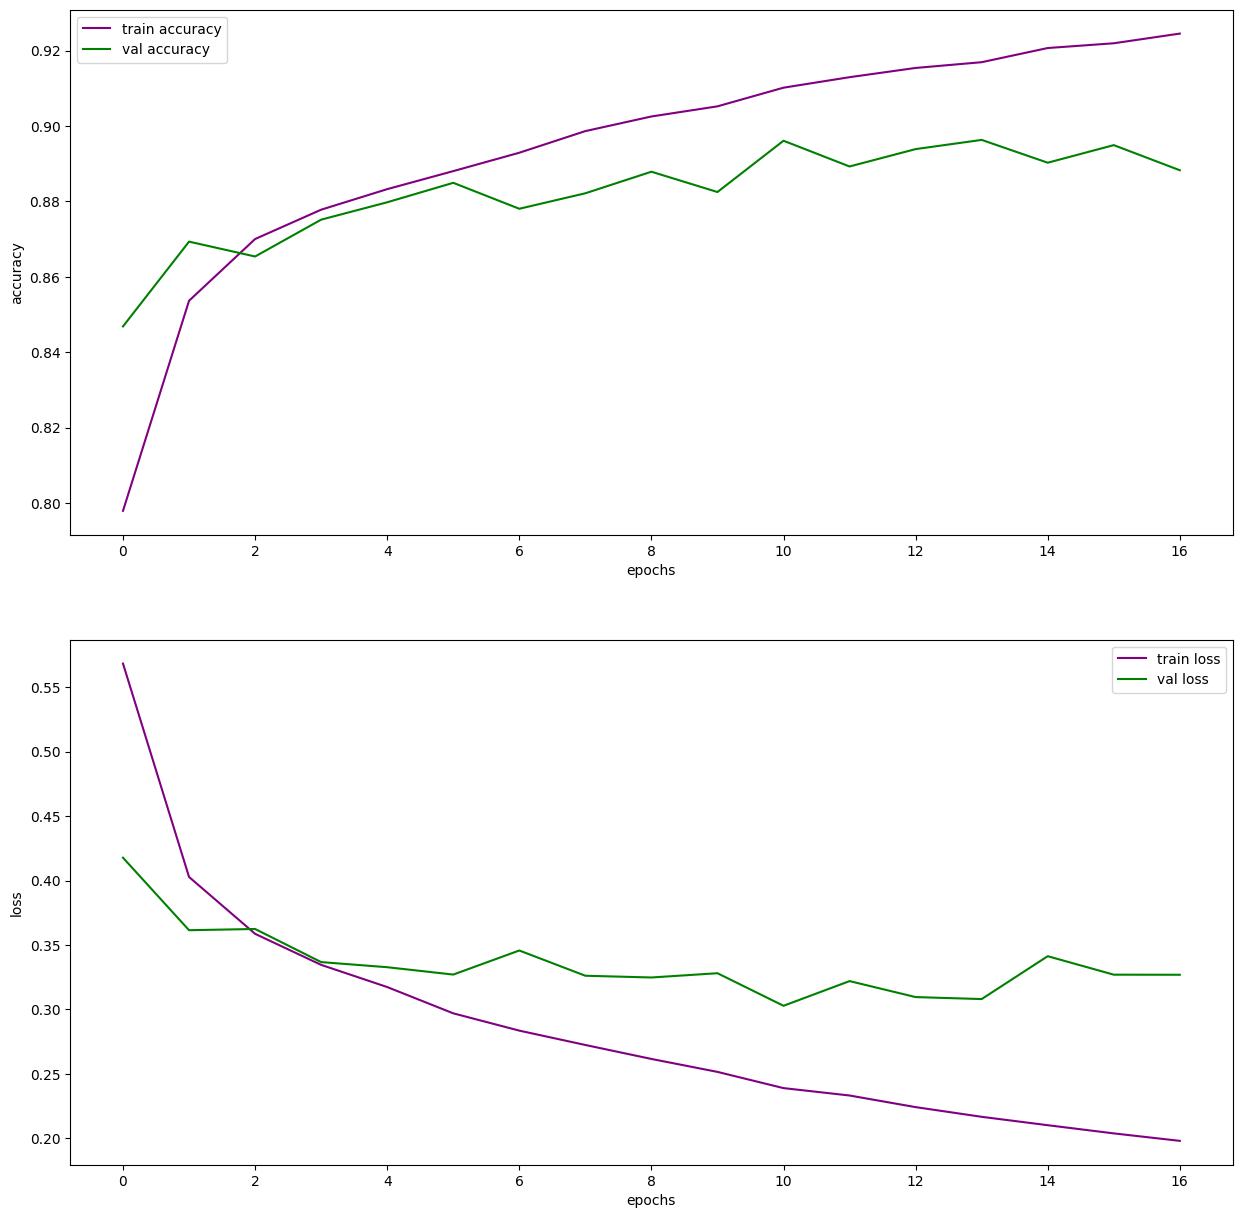

In [83]:
hist = model5.history.history

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
plt.plot(hist['accuracy'], label= 'train accuracy', color = 'purple')
plt.plot(hist['val_accuracy'], label= 'val accuracy', color = 'green')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(hist['loss'], label= 'train loss', color = 'purple')
plt.plot(hist['val_loss'], label= 'val loss', color = 'green')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Test model

In [84]:
model5.load_weights('model5_checkpoint.keras')

In [85]:
y_hat = model5.predict(flatten_X_test)
y_hat_idx = [np.argmax(pred) for pred in y_hat]
y_hat_idx[0], Y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(9, 9)

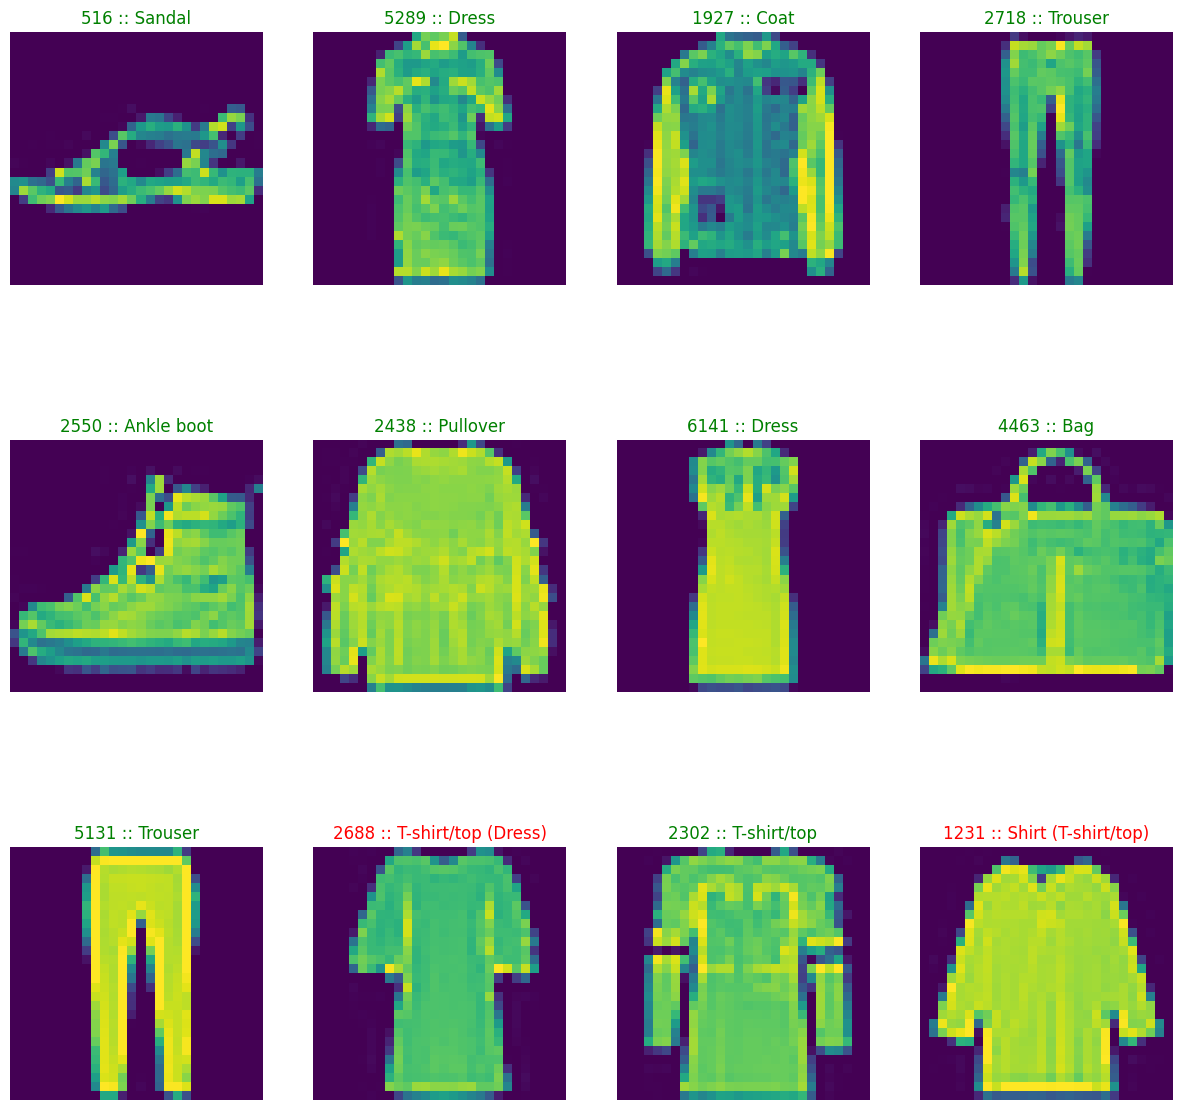

In [86]:
img_idx = np.random.choice(10000, 12)
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [87]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.70%


### Classification Report 

In [88]:
print(classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.89      0.89      0.89      1000
        Coat       0.78      0.84      0.81      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.73      0.68      0.71      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [89]:
reports = classification_report(Y_test, y_hat_idx, target_names=labels, zero_division=0, output_dict=True)

In [90]:
precision = []
recall = []
f1_score = []

for key in labels:
    precision.append(reports[key]['precision'])
    recall.append(reports[key]['recall'])
    f1_score.append(reports[key]['f1-score'])

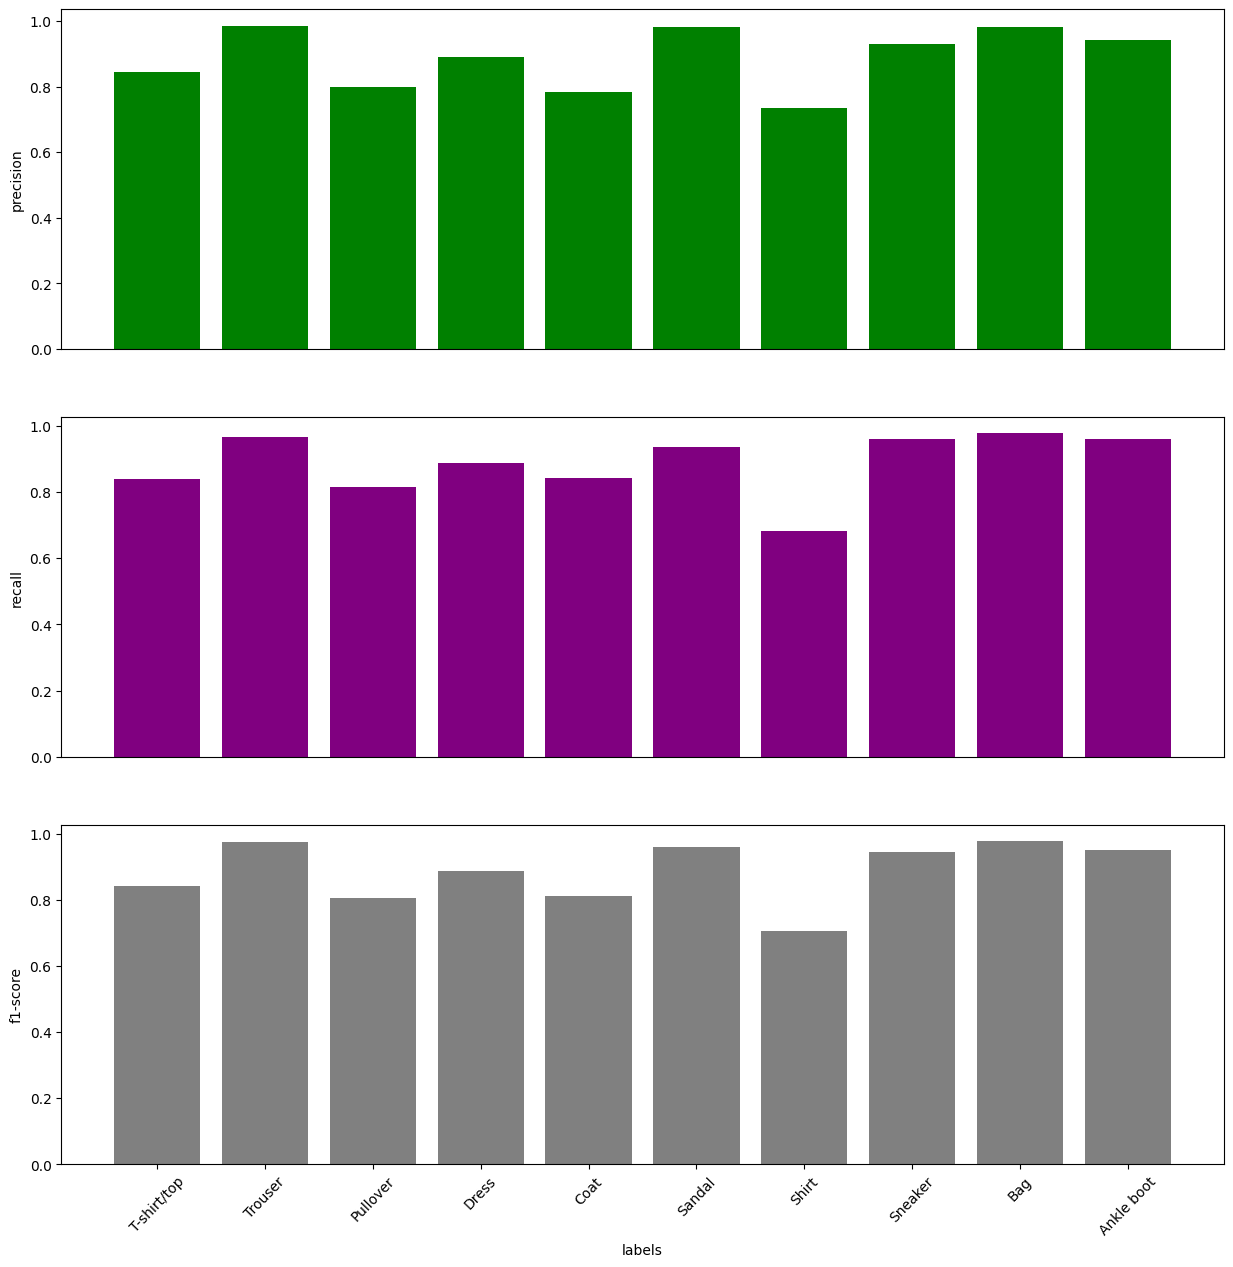

In [91]:
plt.figure(figsize=[15,15])

plt.subplot(3,1,1)
plt.bar(x=labels, height=precision, color = 'green')
plt.xticks(rotation = 45)
plt.ylabel('precision')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,2)
plt.bar(x=labels, height=recall, color = 'purple')
plt.xticks(rotation = 45)
plt.ylabel('recall')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(3,1,3)
plt.bar(x=labels, height=f1_score, color = 'gray')
plt.xticks(rotation = 46)
plt.ylabel('f1-score')
plt.xlabel('labels')

plt.show()

## Dump and Load models

In [92]:
from joblib import dump, load

In [93]:
dump(encoder, 'one-hot-encoder.joblib')

['one-hot-encoder.joblib']

In [94]:
dump(model5, 'best-model-trained.joblib')

['best-model-trained.joblib']

In [95]:
my_model = load('best-model-trained.joblib')

In [96]:
my_encoder = load('one-hot-encoder.joblib')

In [98]:
predictions = my_model.predict(flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [99]:
y_hat_idx = [np.argmax(pred) for pred in predictions]
y_hat_idx[0], Y_test[0]

(9, 9)

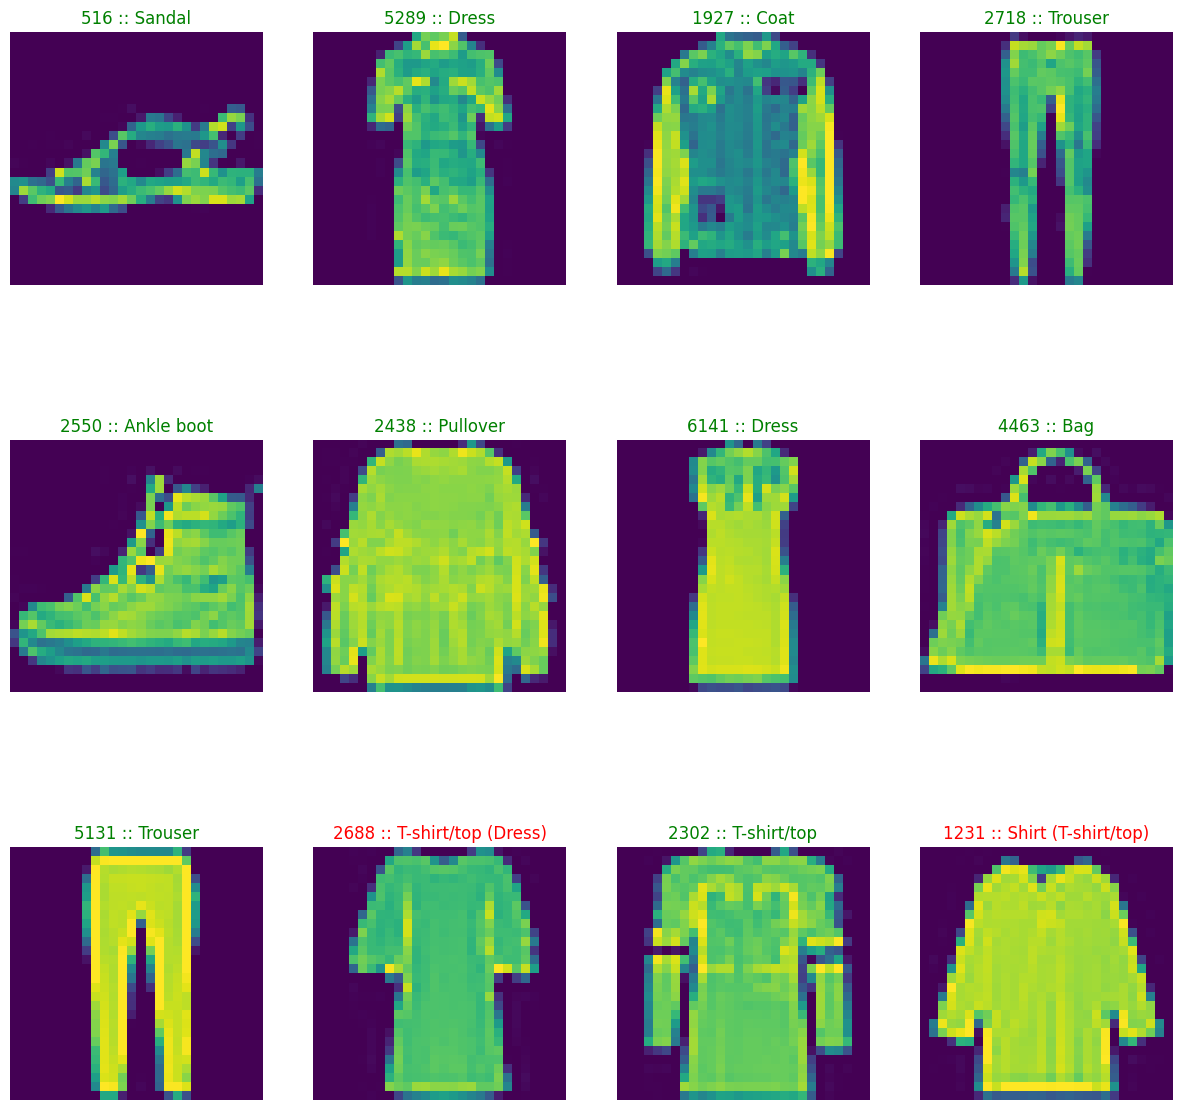

In [100]:
plt.figure(figsize=[15,15])
for i, idx in enumerate(img_idx):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    if y_hat_idx[idx] == Y_test[idx]:
        c='green'
        title = f"{idx} :: {labels[y_hat_idx[idx]]}"
    else :
        c='red'
        title = f"{idx} :: {labels[y_hat_idx[idx]]} ({labels[Y_test[idx]]})"
    plt.title(title, color=c)

In [101]:
print(f"Test accuracy : {100*np.sum(np.array(y_hat_idx)==Y_test)/len(Y_test):.2f}%")

Test accuracy : 88.70%
